In [274]:
import numpy as np
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt

In [180]:
portfolio_tickers = np.array(['PLMR','PRPH','CTXS','PBIP','CIZN','ALK','TM','CAG','TMO','COST','TRU','GS','AMD','MP','CRLBF','DKNG','SQ','SAP','NVDA','TSM','SPCE','PUBM','PLUG','REGI','GEO','BABA','XLV','XBUY','FINX','NURE','PAVE','CNBS','CARZ','URA','HERO','CIBR','VOOG'])

In [182]:
def get_portfolio_close(tickers,start_date,end_date):
    """
    Takes list of equity names: e.g: ['GOOG','AAPL','MSFT']
    Returns pandas dataframe of all equities in portfolio's close prices within given from (start_date,end_date) 
    """
    close_arr = []
    for i in tickers:
        close_arr.append(yf.Ticker(i).history(start = start_date, end = end_date)['Close'])
    closes = pd.DataFrame()
    for i in range(len(close_arr)):
        closes = pd.concat([closes,close_arr[i]],axis = 1)
        closes.columns = tickers[0:i+1]
    return closes

In [83]:
def sharpe_ratio(ticker,start_date,end_date,riskfree_rate = 0):
    """
    Function that calculates Sharpe Ratio: SR = E[R_a-R_f]/std_a for equity 'ticker' over a specified time interval
    Where R_a is the asset returns, R_f is the risk-free rate, and std_a is the standard deviation of asset returns
    
    Returns(Float): Daily Sharpe Ratio(Convert to yearly by multiplying by sqrt(252))
    """
    close_prices = ticker.history(start = start_date, end = end_date)['Close'] #df containing all close prices in specifies range
    daily_returns = close_prices.pct_change(1).dropna() #df containing daily percent return in range
    mean_returns = daily_returns.mean()-riskfree_rate #mean of calulated returns - risk free rate: E[R_a-R_f]
    std_returns = daily_returns.std() #standard deviation of calculated returns: std_a
    return mean_returns/std_returns

In [285]:
portfolio_close = get_portfolio_close(portfolio_tickers,'2020-01-01','2022-01-01')

In [287]:
log_rets = np.log((portfolio_close / portfolio_close.shift(1)))
log_rets_cov = log_rets.cov()

In [288]:
def calculate_returns(weights,log_returns):
    return np.sum(log_returns.mean()*weights)*252

In [289]:
def calculate_volatility(weights,log_return_cov):
    annual_cov = np.dot(log_return_cov*252,weights)
    vol = np.dot(weights.transpose(),annual_cov)
    return np.sqrt(vol)

In [298]:
mc_returns = []
mc_volatility = []
mc_weights = []
N = len(portfolio_tickers)
for i in range(15000):
    weights = np.random.random(N)
    weights = weights / np.sum(weights)
    mc_weights.append(weights)
    sim_returns = calculate_returns(weights = weights,log_returns = log_rets)
    mc_returns.append(sim_returns)
    sim_volatility = calculate_volatility(weights,log_rets_cov)
    mc_volatility.append(sim_volatility)
mc_sharpe_ratios = np.array(mc_returns)/np.array(mc_volatility)

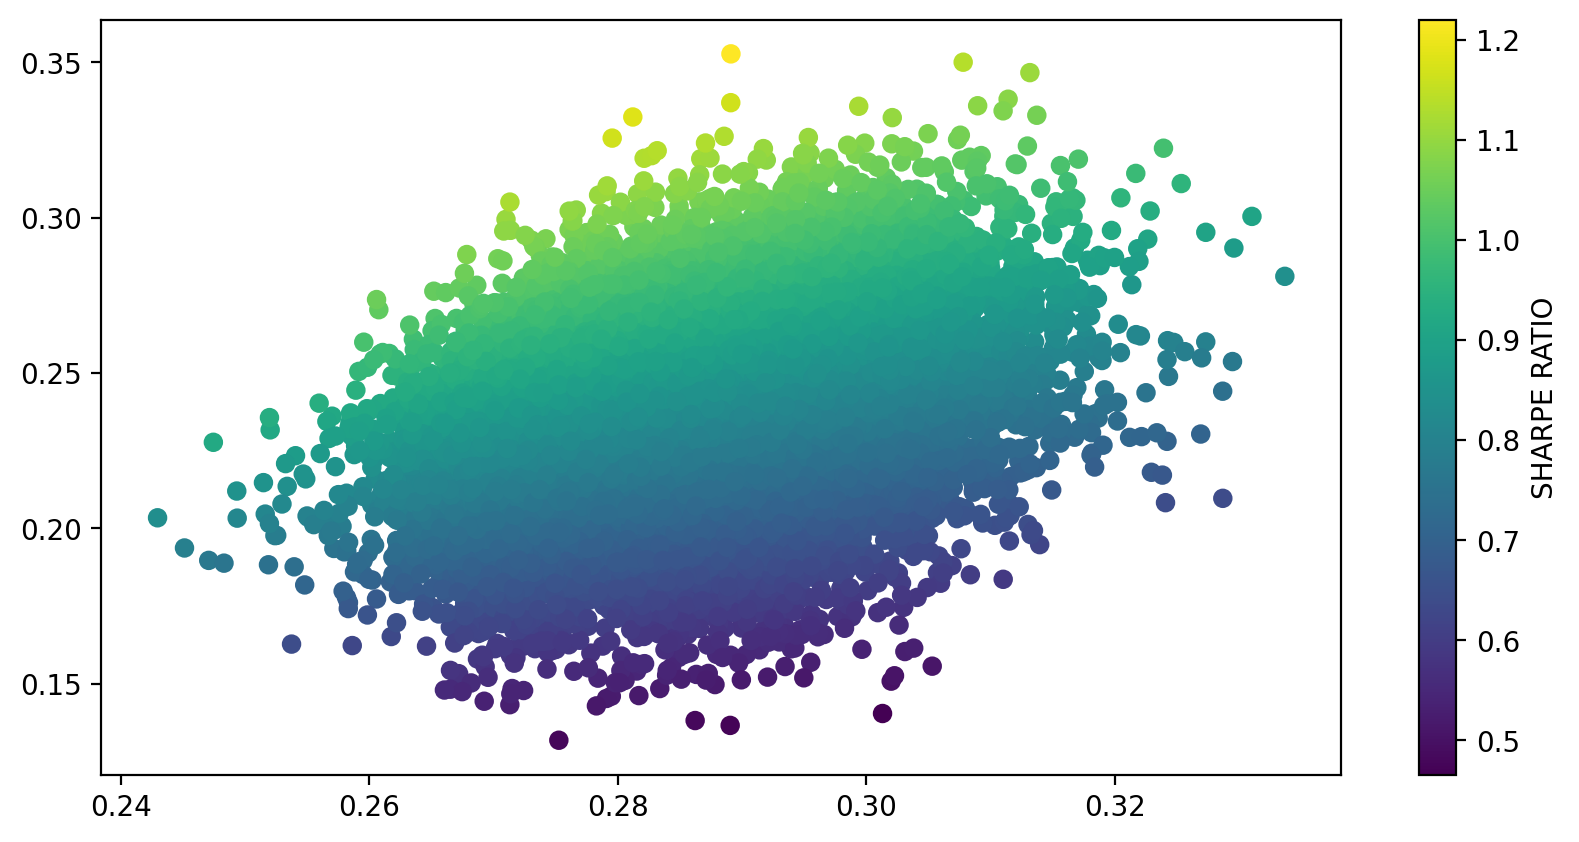

In [299]:
plt.figure(dpi = 200, figsize = (10,5))
plt.scatter(mc_volatility ,mc_returns, c = mc_sharpe_ratios)
plt.colorbar(label = 'SHARPE RATIO')

In [300]:
np.argmax(mc_sharpe_ratios) # Find the highest value

1378

In [301]:
mc_weights[1378] #

array([5.20367646e-03, 5.13418380e-02, 1.44143029e-02, 2.73392222e-02,
       3.23400925e-02, 4.46382583e-03, 5.34616964e-02, 3.50954320e-02,
       3.94229149e-02, 4.34606659e-02, 4.60895602e-02, 4.79956512e-02,
       4.65091867e-02, 4.75169441e-02, 6.50321394e-03, 1.28082617e-02,
       2.92712299e-02, 3.37861656e-05, 5.51145054e-02, 5.17468749e-02,
       4.83798607e-02, 8.96533604e-03, 4.74461285e-02, 2.19268368e-03,
       1.10374720e-03, 8.25960376e-03, 3.25524461e-02, 1.56325659e-02,
       2.46604870e-02, 4.55237769e-03, 3.38793015e-03, 1.79600203e-02,
       3.95196665e-02, 5.42760630e-02, 1.40404643e-02, 1.90959685e-02,
       7.84176937e-03])

In [256]:
def run_monte_carlo(num_sims):
    pass